In [238]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [259]:
base_file_loc = '/home/belle2/jaeyoung/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT'
base_file_loc = '/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_addcosHel'
# base_file_loc = '/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_optimized_v0_240909_roe_Dptag_CFT_nontag'

In [260]:
!ls /share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/

MC15ri_etaetapip_loose_v0_240505_etapi0const
MC15ri_etaetapip_loose_v0_240715_etapi0const
MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT
MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_addcosHel
MC15ri_etaetapip_loose_v0_240910_roe_Dptag_CFT
MC15ri_etaetapip_optimized_v0_240909_roe_Dptag_CFT
MC15ri_etaetapip_optimized_v0_240909_roe_Dptag_CFT_nontag
MC15ri_etaetapip_tight_v2_240708_Kp_BCS_etapi0const
MC15ri_etaetapip_tight_v2_240730_Kp_BCS_etapi0const
MC15ri_etaetapip_tight_v2_240827_roe_Dptag
MC15ri_etaetapip_tight_v2_2_240828_roe_Dptag_CFT
MC15ri_etaetapip_tight_v4_240716_Kp_BCS_etapi0const


In [261]:
!ls /home/belle2/jaeyoung/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT

ls: '/home/belle2/jaeyoung/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT'에 접근할 수 없습니다: 그런 파일이나 디렉터리가 없습니다


In [262]:
# generic_ccbar = base_file_loc + 'ccbar/tight_v2_240827_roe_Dptag_ccbar_output_00*.root'

generic_ccbar = base_file_loc + '/*ccbar.root'

# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

generic_uubar = base_file_loc + '/*uubar.root'
generic_ddbar = base_file_loc + '/*ddbar.root'
generic_ssbar = base_file_loc + '/*ssbar.root'
generic_charged = base_file_loc + '/*charged.root'
generic_mixed = base_file_loc + '/*mixed.root'
generic_taupair = base_file_loc + '/*taupair.root'

In [263]:
base_filter=' Dp_M>0'
# base_filter='etapip_gg_rank==1'
# base_filter+= '  && bdt>0.4'

# base_filter += ' && ((etapip_gamma1_clusterReg==1 && etapip_gamma1_E>0.05) || (etapip_gamma1_clusterReg==3 && etapip_gamma1_E>0.075) || (etapip_gamma1_clusterReg==2 && etapip_gamma1_E>0.05))'
# base_filter += ' && ((etapip_gamma2_clusterReg==1 && etapip_gamma2_E>0.05) || (etapip_gamma2_clusterReg==3 && etapip_gamma2_E>0.075) || (etapip_gamma2_clusterReg==2 && etapip_gamma2_E>0.05))'
# base_filter += ' && Pip_pionID > 0.6'
# base_filter += ' && etapip_Eta_p > 0.8'
# base_filter += ' && etapip_Eta_M > 0.52'
# base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1'
# base_filter += ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7'
# base_filter += ' && dM_pi0_75MeV>0.011 && dM_pi0_75MeV_2>0.011 && Dp_CMS_p>3'

# base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<1.04719'
# base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<1.04719'



# base_filter += " && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1 && \
#                 etapip_Eta_M>0.535 && \
#                 abs(eta_Pi0_daughterDiffOfPhi_0_1)<1.5 && eta_Pi0_daughterAngle_0_1<1.4 && eta_Pi0_M>0.12 && \
#                 etapip_Eta_p>0.8 && etapip_pi0_gamma1_p>0.075 && etapip_pi0_gamma2_p>0.075 && Dp_CMS_p>3 && \
#                 Pih_pionID>0.6 && eta_Pip_pionID>0.6 && eta_Pim_pionID>0.6"

# 0.523598
# base_filter+= ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2.5 && etapip_Eta_daughterAngle_0_1<2 '
# base_filter+= ' && etapip_gamma1_p>0.1 && etapip_gamma2_p>0.1'
# base_filter+= ' && etapip_Eta_M>0.51 && etapip_Eta_M<0.57 '


In [264]:
tree = 'etapip_gg'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p',\
             'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV','ROE_Mgg_mask','dM_pi0_mask',\
             'ROE_Mgg_2','dM_pi0_2','ROE_Mgg_50MeV_2','dM_pi0_50MeV_2','ROE_Mgg_75MeV_2','dM_pi0_75MeV_2','ROE_Mgg_mask_2','dM_pi0_mask_2',\
             'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV','veto_isSignal_mask',\
             'num_Dstar','num_Dstar_no_nan','CFT_qr','CFT_prob']
             #'bdt'



In [265]:
pd_ccbar_0 = get_pd(file=generic_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar_0 = get_pd(file=generic_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar_0 = get_pd(file=generic_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=generic_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged_0 = get_pd(file=generic_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed_0 = get_pd(file=generic_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair_0 = get_pd(file=generic_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [266]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
pd_ddbar = pd_ddbar_0.reset_index(drop=True)
pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
pd_taupair = pd_taupair_0.reset_index(drop=True)

In [267]:
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

14245672
15923847
0.8946124639353794


In [268]:
cut = 'Dp_M>0.0'
# cut += '& Dp_M>1.78 & Dp_M<1.95' 
# cut += ' & num_Dstar_no_nan>0'


# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [273]:
# Extract the directory from the file path
plot_directory = "/share/storage/jykim/storage_b2/storage/PLOTS/mc15ri_generic/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_non_tag/cut_study"
# plot_directory = os.path.dirname(file_path)
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

In [274]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$1000\; \mathrm{fb}^{-1}$"
xrange = (1.6,2.1)
nbins=50
img_path=''
xlabel=''

In [275]:
def wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path="",force_range=tuple(),unit="[GeV/c^2]" ):
    data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
    labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
    MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit=unit,luminosity=luminosity,force_range=force_range,save_repo=img_path)
    plt.tight_layout()

    # plt.savefig(img_path)

In [276]:
# data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$1000\; \mathrm{fb}^{-1}$"

[204660. 203304. 201558. 199930. 196845. 195060. 193308. 190564. 188736.
 186845. 184745. 181996. 180620. 177921. 175070. 173026. 170659. 167455.
 165557. 164027. 161090. 158822. 156896. 154556. 153611. 151329. 149874.
 149481. 148312. 149024. 150320. 153745. 157743. 159166. 155803. 150290.
 143826. 138619. 135858. 133663. 132920. 131607. 131062. 128841. 128880.
 129323. 128898. 129852. 132334. 136368. 143770. 154996. 164014. 168584.
 162070. 147825. 134854. 125556. 119730. 116592. 114941. 112972. 112412.
 111736. 110619. 110096. 108901. 108538. 107884. 106586.]
fitst_bin_entries=204660.0


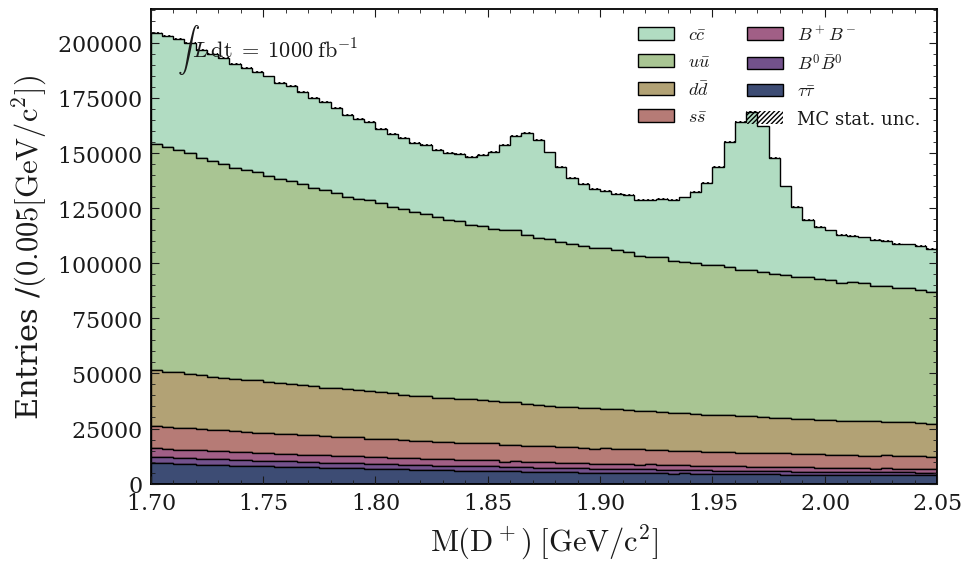

In [277]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.67,2.1)
xrange = (1.7,2.05)

nbins = 70
xlabel = "$\mathrm{M(D^+)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step0.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv1_DpM.png"
img_path = plot_directory + "/MC15ri_Dpetapip_gg_loose_v0_all.png"

# img_path = plot_directory + "/test.png"

# plt.ylim(0,150000)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path="")
# plt.ylim(0,90000)
# plt.savefig(img_path)


[1.5150637e+07 0.0000000e+00 6.2479200e+05 1.1756700e+05 2.3455000e+04
 5.4710000e+03 1.3370000e+03 3.8600000e+02 1.2800000e+02 4.2000000e+01
 2.5000000e+01]
fitst_bin_entries=15150637.0


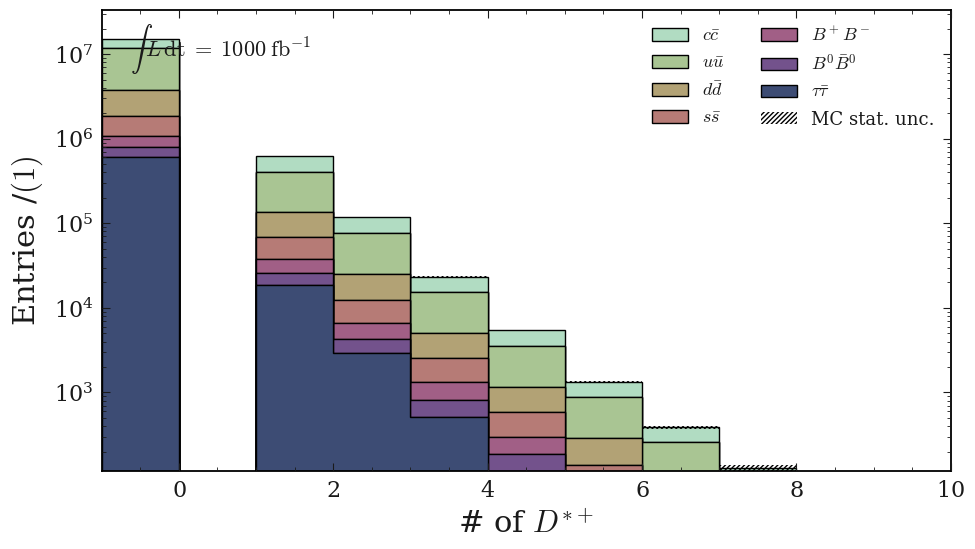

In [278]:
var = 'num_Dstar_no_nan'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
# data = [pd_taupair[var if var != -1 else 0], 
#        pd_mixed[var if var != -1 else 0], 
#        pd_charged[var if var != -1 else 0], 
#        pd_ssbar[var if var != -1 else 0], 
#        pd_ddbar[var if var != -1 else 0], 
#        pd_uubar[var if var != -1 else 0], 
#        pd_ccbar[var if var != -1 else 0]]


xrange = (1.67,2.1)
xrange = (-1,10)
nbins = 11
xlabel = r"# of $D^{*+}$"
unit = ""

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step0.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv1_DpM.png"
img_path = plot_directory + "/MC15ri_Dpetapip_gg_loose_v0_all_num_Dstar_no_nan.png"

img_path = plot_directory + "/test.png"

# plt.ylim(0,150000)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path="",unit=unit)
# plt.ylim(0,90000)
plt.yscale("log")
# plt.tight_layout()
# plt.savefig(img_path)


In [281]:
cut = 'Dp_M>0.0'
cut += ' & num_Dstar_no_nan<0'


# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'v

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[195451. 193619. 192210. 190659. 187821. 186069. 184310. 181639. 179991.
 178165. 176074. 173387. 171894. 169609. 166601. 164811. 162558. 159423.
 157654. 156059. 153386. 151085. 149186. 147155. 146024. 143724. 142361.
 142037. 140929. 141212. 141907. 144673. 147672. 148451. 145495. 140980.
 135541. 131321. 128881. 127106. 126315. 125063. 124492. 122491. 122604.
 122982. 122480. 123438. 125958. 129931. 137053. 148036. 156768. 161196.
 154866. 141090. 128497. 119508. 113849. 110642. 109114. 107086. 106694.
 105843. 104847. 104462. 103249. 102987. 102409. 101165.]
fitst_bin_entries=195451.0


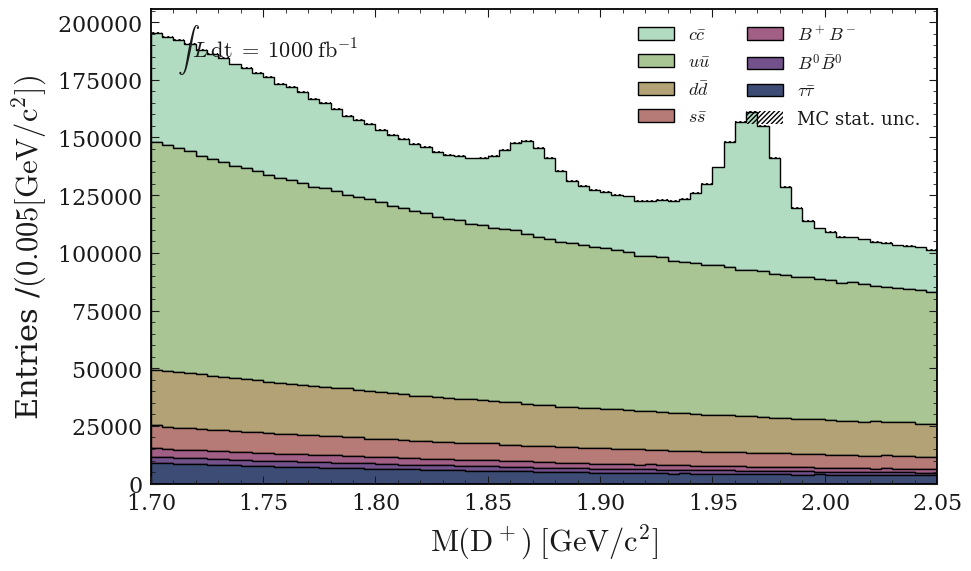

In [282]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.7,2.05)
nbins = 70
xlabel = "$\mathrm{M(D^+)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step1.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_loose_v0_step1_Dstartag.png"
img_path = plot_directory + "/MC15ri_Dpetapip_gg_loose_v0_nontag.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

In [285]:
cut = 'Dp_M>0.0'
cut += ' & abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7'
# cut += ' & Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1'


# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'v

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[160628. 160010. 157833. 155566. 153358. 150661. 148194. 146146. 144048.
 140732. 137069. 135085. 131669. 128721. 126227. 123383. 120818. 118659.
 116649. 115934. 115756. 117097. 122178. 127975. 126690. 118885. 110456.
 105823. 103389. 102478. 101514. 100463. 101596. 101977. 106339. 115467.
 131828. 150440. 153930. 133905. 111617.  97594.  91370.  89339.  87449.
  86382.  85302.  84056.  84105.  82876.]
fitst_bin_entries=160628.0


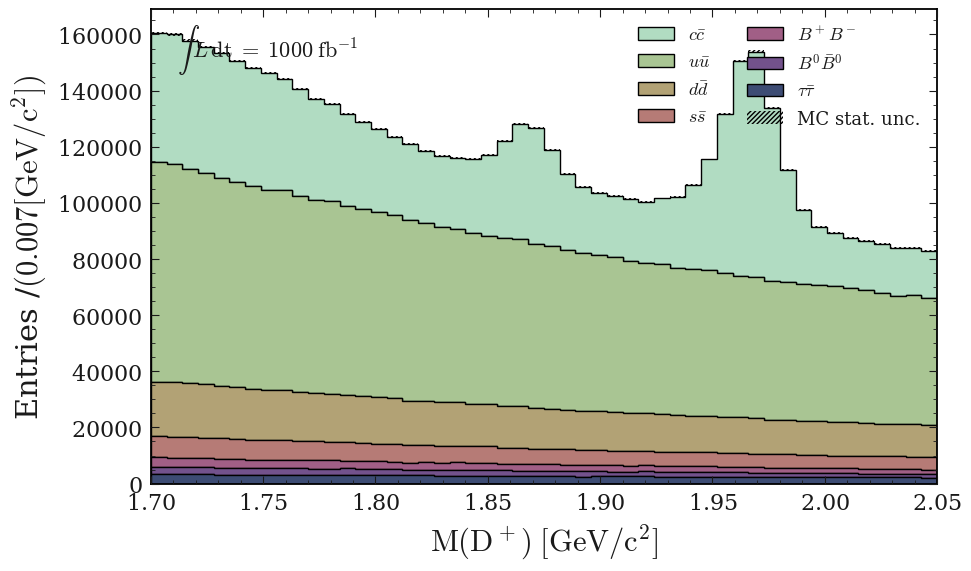

In [286]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.7,2.05)
nbins = 50
xlabel = "$\mathrm{M(D^+)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step2.png"
img_path = plot_directory + "/MC15ri_Dpetapip_gg_loose_v0_step2_eta_angle_cuts_nontag.png"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv0_DpM.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

## FOM

In [162]:
pd_ccbar_bkg = pd_ccbar.query('Dp_isSignal!=1')
pd_all = pd.concat([pd_ccbar_bkg,
                    pd_uubar,
                    pd_ddbar,
                    pd_ssbar,
                    pd_charged,
                    pd_mixed,
                    pd_taupair], ignore_index=True)

# pd_all = pd_ccbar

In [163]:
def calculate_FOM( bkg_pd, sig_pd, cut_list, scale_factor, cut):
    
    FOM_list = list()
    
    for cut_value in cut_list:
    
        temp_cut = cut + str(cut_value) 
        temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        nbkg = len(temp_bkg_pd)

#         FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))

        FOM_list.append(FOM)    
    
    return FOM_list

In [164]:
def calculate_eff( bkg_pd, sig_pd, cut_list, cut):
    
    eff_list = list()
    
    for cut_value in cut_list:
    
        #temp_cut = 'gamma_E > ' + str(cut_value) 
        temp_cut = cut + str(cut_value) 

        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)

        eff = nsig/(0.5*1e+6)
        eff_list.append(eff)    
    
    return eff_list

In [165]:
def calculate_purity( bkg_pd, sig_pd, cut_list, cut):
    
    purity_list = list()
    
    for cut_value in cut_list:
    
        #temp_cut = 'gamma_E > ' + str(cut_value) 
        temp_cut =  cut +  str(cut_value) 
        
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        
        nREALsig = len(temp_sig_pd.query("Dp_isSignal==1"))
        
        #nbkg = len(temp_bkg_pd)

        purity = nREALsig/nsig
        purity_list.append(purity)    
    
    return purity_list

In [166]:
def plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list, xlabel ,offset=85):


    fig, host = plt.subplots(figsize=(9,6)) # (width, height) in inches    
    par1 = host.twinx()
    # par2 = host.twinx()

    #host.set_xlim(2, 3.5)
    # host.set_ylim(0, 2)
    # par2.set_ylim(0, 4)
    #par1.set_ylim(0,0.16 )
    # par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                            # offset=(offset, 0))
    # par2.axis["right"].toggle(all=True)

    host.set_xlabel(xlabel)
    host.set_ylabel("FOM")
    par1.set_ylabel("Efficiency")
    # par2.set_ylabel("Purity")

    # color1 = plt.cm.viridis(0)
    # color2 = plt.cm.viridis(0.5)
    # color3 = plt.cm.viridis(.9)
    color1 = 'r'
    color2 = 'g'
    color3 = 'b'

    p1, = host.plot(FOM_cut_list, FOM_phig_list,    color=color1, label="FOM")
    p2, = par1.plot(FOM_cut_list, eff_phig_list,    color=color2, label="Efficiency")
    # p3, = par2.plot(FOM_cut_list, purity_phig_list, color=color3, label="Purity")

    
    # lns = [p1, p2, p3]
    lns = [p1, p2]

    host.legend(handles=lns, loc='best')
    # right, left, top, bottom
    offset = offset
    # par2.spines['right'].set_position(('outward', offset))

    # no x-ticks                 
    # par2.xaxis.set_ticks([])

    # Sometimes handy, same for xaxis
    # par2.yaxis.set_ticks_position('right')

    # Move "Velocity"-axis to the left
    # par2.spines['left'].set_position(('outward', 60))
    # par2.spines['left'].set_visible(True)
    # par2.yaxis.set_label_position('left')
    # par2.yaxis.set_ticks_position('left')

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    # par2.yaxis.label.set_color(p3.get_color())

    plt.title(r'$D^+ \to \eta_{\gamma\gamma} \gamma$')
    # plt.axvline(x=2.45,  color='orange', linestyle='dotted')

    # Adjust spacings w.r.t. figsize
    fig.tight_layout()

In [167]:
def calculate_FOM_3D(bkg_pd, sig_pd, grid_list, scale_factor, cut_x, cut_y, cut_z):
 
    FOM_list = list()
    
    for points_3d in grid_list:
        
        points_3d_x, points_3d_y, points_3d_z =  points_3d[0], points_3d[1], points_3d[2]
    
        temp_cut = cut_x + str(points_3d_x) + ' & ' +  cut_y + str(points_3d_y) + ' & ' + cut_z + str(points_3d_z) 
        temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)    
        
        nsig = len(temp_sig_pd)
        nbkg = len(temp_bkg_pd)
        # print(str(scale_factor*nsig + nbkg) + ' nsig=' + str(nsig) + ', nbkg=' + str(nbkg) + ', cut=' + temp_cut )
#         FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM_list.append(FOM)    
        
    return FOM_list

In [168]:
# # sigMC_file_loc = base_file_loc + 'topo/resultfile/result_phi/standard.root'
# sigMC_file_loc = base_file_loc + '/*ccbar.root'

# base_filter=' num_Dstar_no_nan>0 && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 && etapip_Eta_daughterAngle_0_1<1.7'
# # base_filter += '&& nSigCascDcyBr_0==1'
# base_filter += '&& Dp_isSignal==1'
# # base_filter+='&& abs(D0_cosHel_0)<0.8'

# # base_filter += '&& gamma_E>0.48'

# # variables=['D0_M','D0_cosHel_0','Phi_M','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','gamma_E']
# tree='etapip_gg'

pd_ccbar_signal = pd_ccbar.query('Dp_isSignal==1')

# pd_ccbar_signal = get_pd(file=sigMC_file_loc, tree=tree,base_filter=base_filter,variables=variables)
print(len(pd_ccbar_signal))

85241


In [169]:
# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_v26_half1M_1_pre_ext_signalMC_recon_mdst_phi.root'
# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_phi_*.root'
half_1_sigMC = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_gg/240828_loose_v0_roe_Dptag/*.root'
# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# base_filter='D0_M>1.8 && D0_M<1.9'
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001  && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001  && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5'

# base_filter += '&& Dstarp_isSignal==1'

# # base_filter += '&& gamma_E>0.48'

base_filter = 'num_Dstar_no_nan<0 && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 && etapip_Eta_daughterAngle_0_1<1.7 && Dp_isSignal==1'
base_filter += ' && Dp_M>1.78 && Dp_M<1.95'
pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)


# pd_half_1_sigMC = pd_ccbar_signal

scale_factor = len(pd_ccbar_signal)/len(pd_half_1_sigMC)
print(scale_factor)

0.8067556952081697


In [170]:
list(pd_ccbar)

['__experiment__',
 '__run__',
 '__event__',
 'Dp_M',
 'Dp_isSignal',
 'Dp_CMS_p',
 'Dp_cosAngleBetweenMomentumAndVertexVector',
 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'Dp_acos_cosAngleBetweenMomentumAndVertexVector',
 'Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'etapip_Eta_M',
 'etapip_Eta_isSignal',
 'etapip_Eta_daughterDiffOfPhi_0_1',
 'etapip_Eta_daughterAngle_0_1',
 'etapip_Eta_Easym',
 'etapip_Eta_p',
 'etapip_gamma1_p',
 'etapip_gamma2_p',
 'etapip_gamma1_clusterNHits',
 'etapip_gamma2_clusterNHits',
 'etapip_gamma1_clusterReg',
 'etapip_gamma2_clusterReg',
 'Pip_pionID',
 'Pip_pionIDNN',
 'Pip_mcPDG',
 'Pip_dr',
 'Pip_p',
 'ROE_Mgg',
 'dM_pi0',
 'ROE_Mgg_50MeV',
 'dM_pi0_50MeV',
 'ROE_Mgg_75MeV',
 'dM_pi0_75MeV',
 'ROE_Mgg_mask',
 'dM_pi0_mask',
 'ROE_Mgg_2',
 'dM_pi0_2',
 'ROE_Mgg_50MeV_2',
 'dM_pi0_50MeV_2',
 'ROE_Mgg_75MeV_2',
 'dM_pi0_75MeV_2',
 'ROE_Mgg_mask_2',
 'dM_pi0_mask_2',
 'veto_isSignal',
 'veto_isSignal_50MeV',
 'veto_isSignal_75M

In [ ]:
X, Y, Z = np.mgrid[0.99950:0.99999:50j, 0.4:1.4:101j, 0.4:0.8:41j]
a = zip(X.ravel(), Y.ravel(), Z.ravel())
A_list = list(a)

grid_list = A_list
cut_x = 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane > '
cut_y = 'etapip_Eta_p > '
cut_z = 'Pip_p > '

scale_factor=scale_factor

FOM_phig_list = calculate_FOM_3D(pd_all,pd_half_1_sigMC, grid_list ,scale_factor, cut_x,  cut_y, cut_z )


In [ ]:
# # Number to be equally divided
# number_to_divide = 2

# # Update each element in the list
# for i in range(len(FOM_phig_list)):
#     FOM_phig_list[i] = FOM_phig_list[i]/number_to_divide


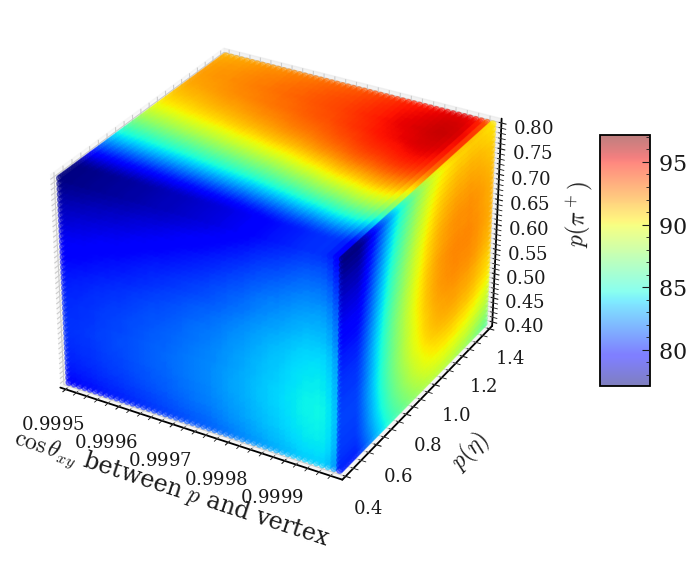

In [176]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# scat = ax.scatter(X, Y, Z, c=T.flatten(), alpha=0.5)
scat = ax.scatter(X, Y, Z, c=FOM_phig_list, alpha=0.5, cmap = 'jet')
# scat = ax.scatter(X, Y, Z, c=FOM_phig_list, alpha=0.5)

fig.colorbar(scat, shrink=0.5, aspect=5 , pad = 0.1)

ax.set_xlabel(r'$\cos \theta_{xy}$ between $p$ and vertex',fontsize=17)
#ax.set_ylabel(r'Second FBDT cut',fontsize=17)
ax.set_ylabel(r'$p(\eta)$',fontsize=17)
ax.set_zlabel(r'$p(\pi^+)$',fontsize=17)
ax.tick_params(axis='both', which='major', labelsize=13)

# Set axis ranges to their full extent
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())


# ax.ticklabel_format(axis = 'z',  style='sci', scilimits = (0,1))
# ax.dist = 10
ax.xaxis.labelpad=8
ax.yaxis.labelpad=12
ax.zaxis.labelpad=15.5


plt.tight_layout()
plt.savefig('FOM_MC15ri_3d_20240909_sigregion_178_195_nontag.png')
plt.show()

In [33]:
#base_filter+='&& abs(D0_cosHel_0)<0.8'

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=50.63039825544764, cut value=(0.01, 0.6, 0.41000000000000003)


In [37]:
#base_filter+='&& abs(D0_cosHel_0)<0.8'

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=52.77986106727667, cut value=(0.015, 0.7, 0.42000000000000004)


In [70]:
#base_filter+='&& abs(D0_cosHel_0)<0.8'

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=53.27808175308169, cut value=(0.9998, 0.8, 0.43)


In [112]:
#base_filter+='&& abs(D0_cosHel_0)<0.8'

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=56.69399262795215, cut value=(0.999855, 1.2799999999999998, 0.48)


In [43]:
#base_filter+='&& abs(D0_cosHel_0)<0.8'

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=56.668593966255074, cut value=(0.99985, 1.2799999999999998, 0.48)


In [84]:
#base_filter+='&& abs(D0_cosHel_0)<0.8'

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=86.50647113106099, cut value=(0.9996400000000001, 1.14, 0.48)


In [177]:
#no_tag

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=97.1619422587368, cut value=(0.9999300000000001, 1.2399999999999998, 0.63)


max=27.036082054152576, cut value=0.94


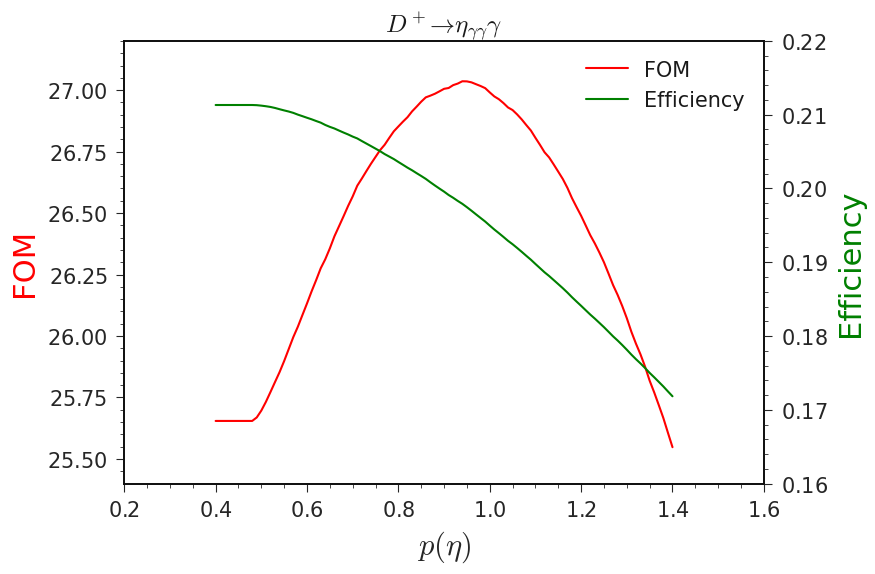

In [107]:
FOM_cut_list = np.linspace(0.4,1.4,101)
cut = 'etapip_Eta_p > '

# FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor*0.5, cut = cut  )



purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r'$p(\eta)$',offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
# plt.axvline(x=0.48,  color='magenta', linestyle='dotted',lw=2)

# plt.savefig("MC15ri_omega_after_pre_ext_Eg_FOM.png")
plt.savefig('FOM_MC15ri_1d_Etap_20240906_nontag.png')


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=28.065307691991325, cut value=0.59


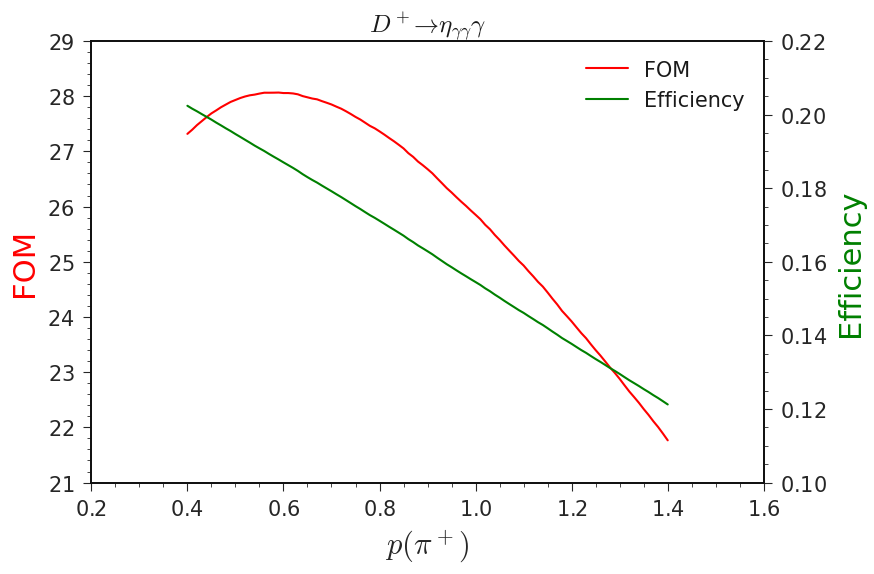

In [108]:
FOM_cut_list = np.linspace(0.4,1.4,101)
cut = 'Pip_p > '

# FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor*0.5, cut = cut  )



purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r'$p(\pi^+)$',offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
# plt.axvline(x=0.48,  color='magenta', linestyle='dotted',lw=2)

# plt.savefig("MC15ri_omega_after_pre_ext_Eg_FOM.png")
plt.savefig('FOM_MC15ri_1d_Pipp_20240906_nontag.png')


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=24.565812575742935, cut value=0.999905


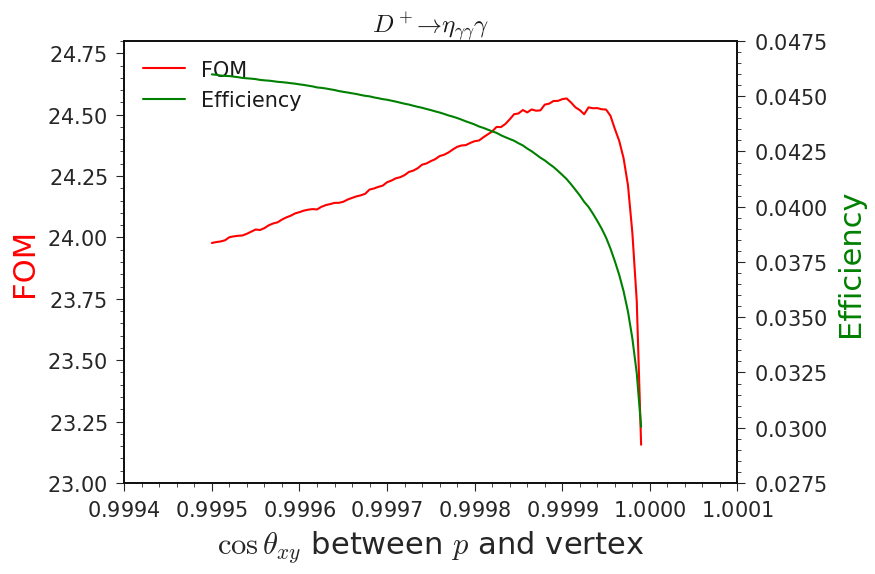

In [52]:
FOM_cut_list = np.linspace(0.99950,0.99999,49*2+1)
cut = 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane > '

# FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor*0.5, cut = cut  )



purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r'$\cos \theta_{xy}$ between $p$ and vertex',offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
# plt.axvline(x=0.48,  color='magenta', linestyle='dotted',lw=2)

# plt.savefig("MC15ri_omega_after_pre_ext_Eg_FOM.png")

plt.savefig('FOM_MC15ri_1d_cosXY_20240906.png')

print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))